1 101915.44780219778
2 38767.57613130849
3 23348.44766997709
4 17651.597054637426
5 14109.519258373604
6 12405.2747194279
7 11216.157275845622
8 10491.739255448743
9 9829.747053590896
10 9365.573534683721


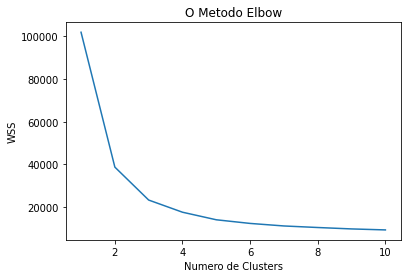

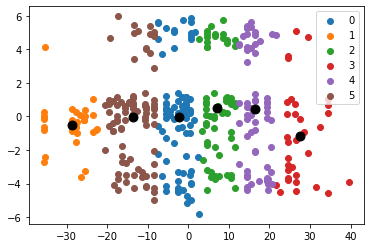

In [12]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import tratarDados

tratarDados.tratarDados()

dados = pd.read_csv('./dermatology.data')
dados = dados.drop('result',axis=1)
data = dados.values

# Vamos escolher a quantidade de clusters baseado no método Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')
plt.show()

pca = PCA(2)
data = pca.fit_transform(data)

kmeans = KMeans(n_clusters = 6, init = 'random')
dadosClassificados = kmeans.fit_predict(data)

# pegar a posição dos clusters:
clusters = kmeans.cluster_centers_
# array com as classificações possíveis
classificacoes = np.unique(dadosClassificados)
 
# plotando o resultado:
for i in classificacoes:
    plt.scatter(data[dadosClassificados == i , 0] , data[dadosClassificados == i , 1] , label = i)
plt.scatter(clusters[:,0] , clusters[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()